In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('SPAM text message 20170820 - Data.csv', sep=',')

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
len(df)

5572

In [5]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [6]:
df['Category'].unique()

array(['ham', 'spam'], dtype=object)

In [7]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [39]:
print('Percent Ham messages : {}'.format(round(len(df[df['Category']=='ham'])/len(df)*100,2)))
print('Percent Spam messages : {}'.format(round(len(df[df['Category']=='spam'])/len(df)*100,2)))

Percent Ham messages : 86.59
Percent Spam messages : 13.41


In [8]:
length = []
for i in df['Message']:
    length.append(len(i))
df['Length'] = length

In [9]:
df.head()

,Category,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
df['Length'].describe()

count    5572.000000
mean       80.368988
std        59.926946
min         2.000000
25%        35.750000
50%        61.000000
75%       122.000000
max       910.000000
Name: Length, dtype: float64

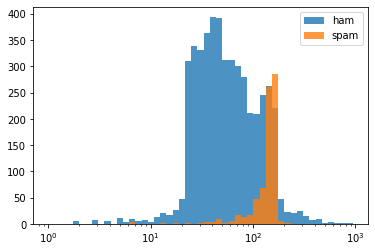

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['Category']=='ham']['Length'],bins=bins,alpha=0.8)
plt.hist(df[df['Category']=='spam']['Length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

It looks like there's a small range of values where a message is more likely to be spam than ham.

In [40]:
from sklearn.model_selection import train_test_split

x = df['Message']  
y = df['Category']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=45)

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [42]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

text_clf.fit(x_train, y_train)  

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

In [43]:
pred= text_clf.predict(x_test)

In [45]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,pred))

[[1444    4]
 [  23  201]]


In [47]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1448
        spam       0.98      0.90      0.94       224

    accuracy                           0.98      1672
   macro avg       0.98      0.95      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [49]:
print(metrics.accuracy_score(y_test,pred))

0.9838516746411483


Using the text of the messages, our model performed exceedingly well; it correctly predicted spam **98.97%** of the time!<br>